## Deep Learning Project - Lumbar spine segmentation in MR images

This notebook is a part of the final project for the course "Deep Learning" at Innopolis University. The goal of the project is to develop a deep learning model for the segmentation of the lumbar spine in MR images. The dataset used in this project is the "Lumbar spine MRI images for bone segmentation" dataset from SPIDER Website. The dataset contains 447 MR images of the lumbar spine. The images are divided into two classes: the lumbar spine and the masks. The goal of the project is to develop a deep learning model that can accurately segment the lumbar spine in MR images.


## Group members:
- **Abdullah Abdulghany -- 231000115**
- **Saif Fouda -- 231001857**
- **Nada Salah -- 222000212**

## Project Structure:
    -[x] Data Preprocessing: In this section, we will load the dataset and preprocess it.
    -[ ] Model: In this section, we will define the model architecture.
    -[ ] Training: In this section, we will train the model.
    -[ ] Evaluation: In this section, we will evaluate the model.
    -[ ] Results: In this section, we will show the results of the model.
    -[ ] Conclusion: In this section, we will conclude the project.

### 1. Data Preprocessing:
- Read the images and labels from the .mha files.
- Convert mha to nii format to be able to read the images.
- Decode the images and labels.
- Resize the images to the desired size.
- Apply preprocess techniques to images and masks.

In [7]:
from dataset import *

##### Define Methods and Constants:
- Define the methods and constants that will be used in the project.
##### Obstacles:
- Extracting Sagittal images from the dataset required to define the axis of the images. and try to standardize the axis of the images to be able to extract the sagittal images.

In [6]:
# Set the paths
base_path = '../inputs/'
image_path = os.path.join(base_path, 'images')
mask_path = os.path.join(base_path, 'masks')
sagittal_view_list = {}
mask_list = {}

# Find maximum dimensions for images
max_dimensions, sagittal_view_list = find_max_dimensions(base_path, 'images')
print("Max Dimension for images= ",max_dimensions)

# Find maximum dimensions for masks
max_dimensions_mask, mask_list = find_max_dimensions(base_path, 'masks')
print("Max Dimension for Masks=",max_dimensions_mask)

100_t1.nii
Affine matrix: [[  -4.38969612    0.            0.           44.77723312]
 [   0.           -0.63051754    0.          122.5778656 ]
 [   0.            0.            0.38792315 -106.77207184]
 [   0.            0.            0.            1.        ]]
Reoriented_data =  (21, 492, 797)
100_t2.nii
Affine matrix: [[  -4.38969612    0.            0.           44.77723312]
 [   0.           -0.63051754    0.          122.5778656 ]
 [   0.            0.            0.38792315 -106.77207184]
 [   0.            0.            0.            1.        ]]
Reoriented_data =  (21, 492, 797)
101_t1.nii
Affine matrix: [[  -4.78876543    0.            0.           67.28903961]
 [   0.           -0.8125        0.          124.77838135]
 [   0.            0.            0.87628824 -103.8228302 ]
 [   0.            0.            0.            1.        ]]
Reoriented_data =  (17, 320, 298)
101_t2.nii
Affine matrix: [[  -4.7905674     0.            0.           67.28903961]
 [   0.           -0.677

#### Plotting Images and Masks after extracting Sagittal view from the 3D image
- Plot the images and masks after extracting the Sagittal view from the 3D image.

#### Obstcale Detection
- Couldn't laod the masks images as segmentation masks.

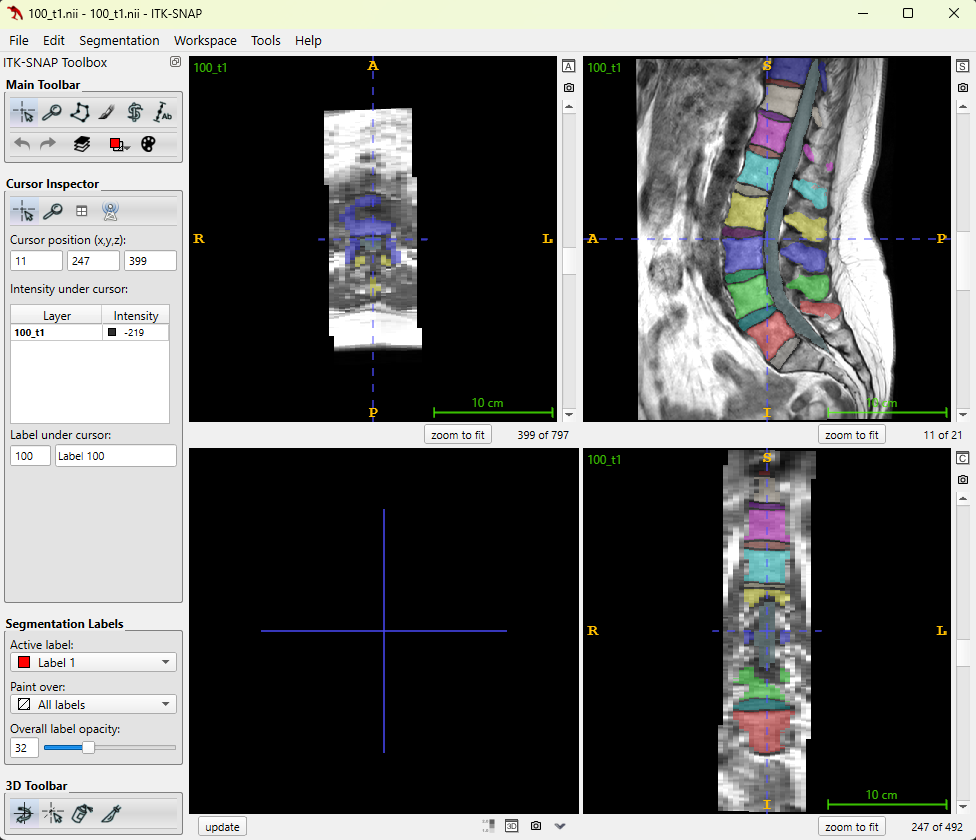


Plotting 10 Images


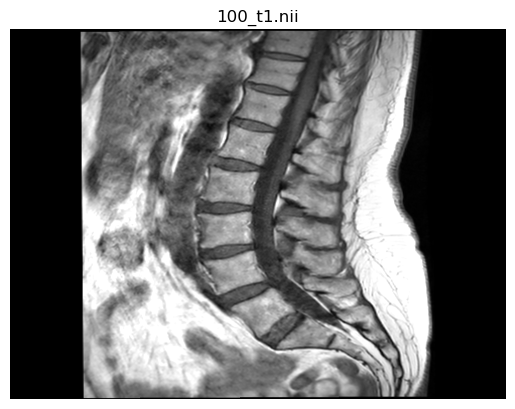

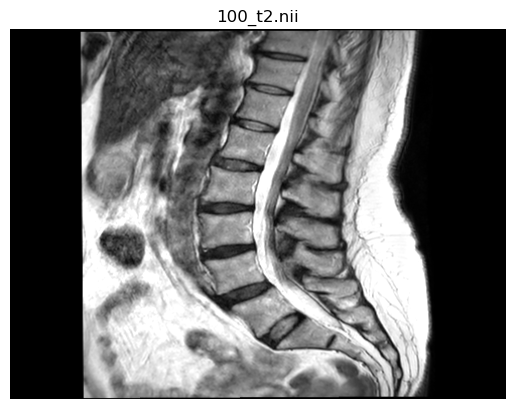

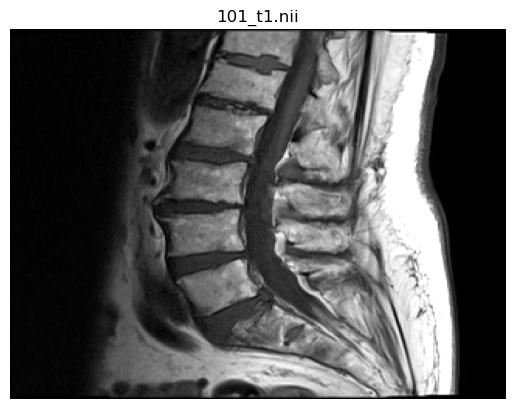

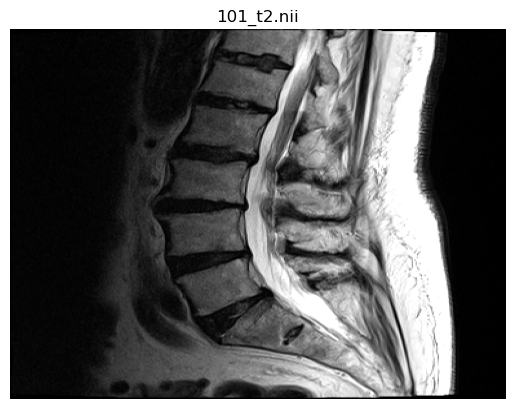

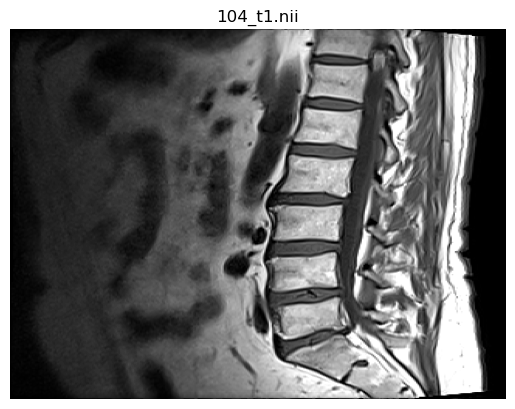

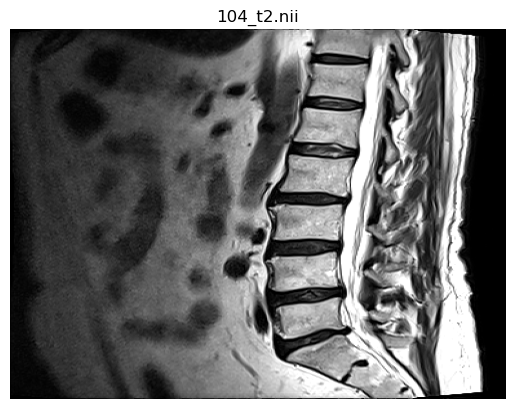

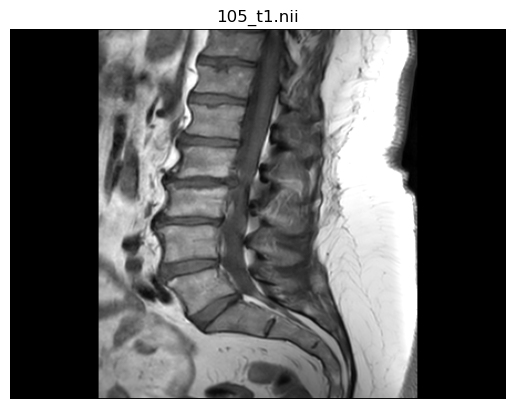

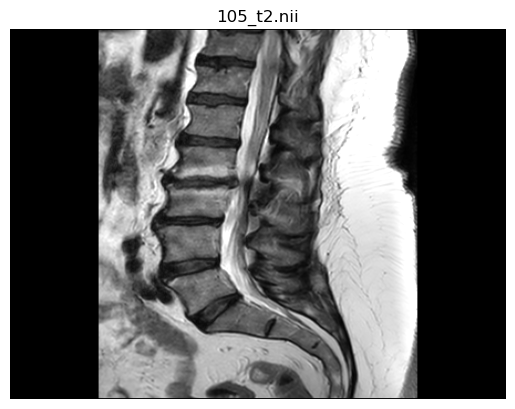

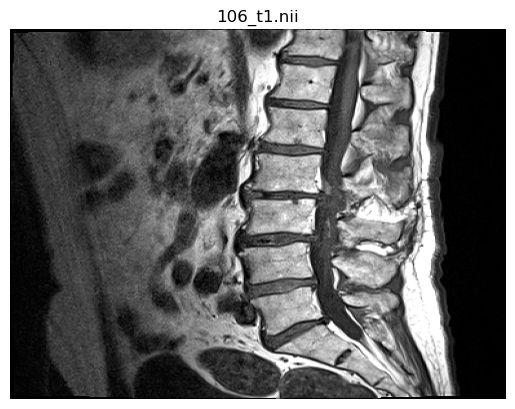

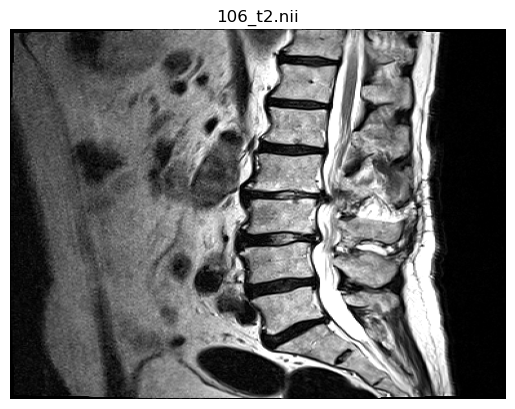

Plotting 10 Masks


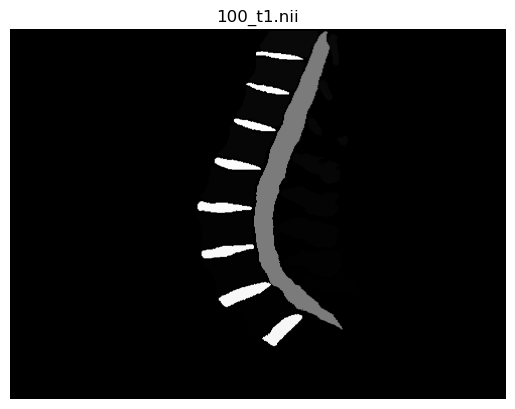

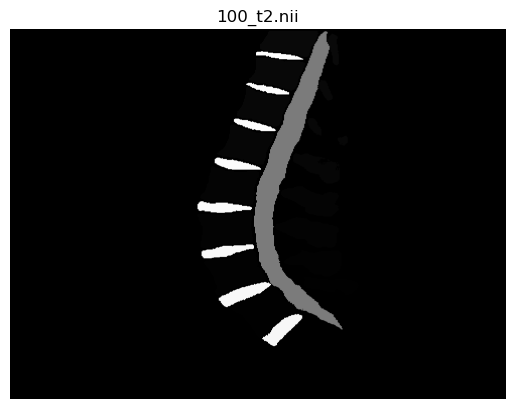

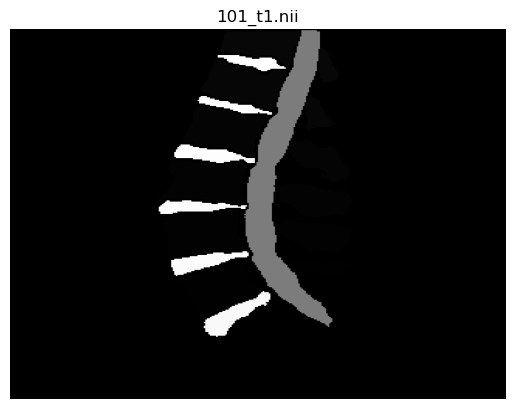

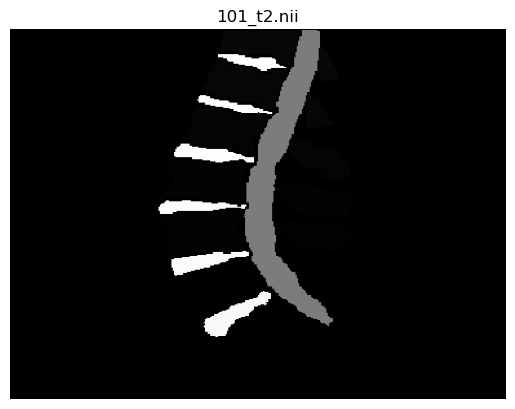

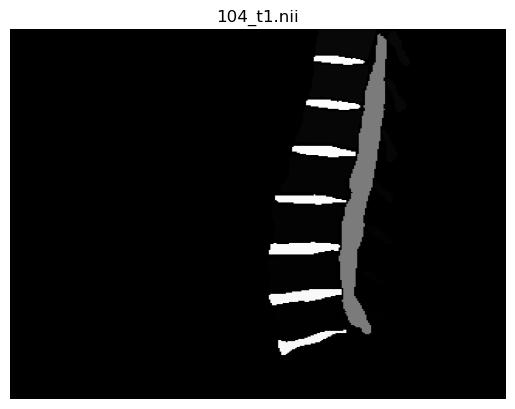

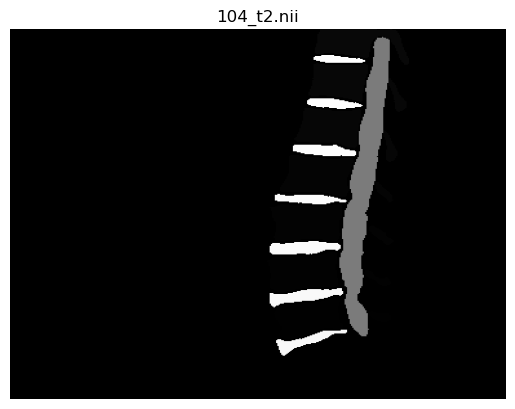

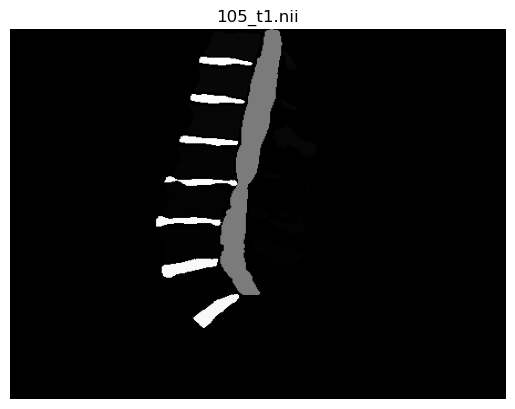

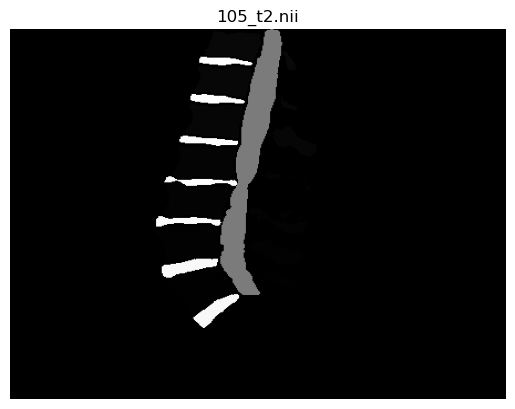

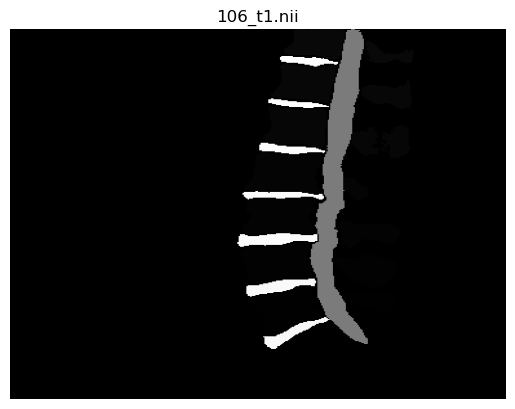

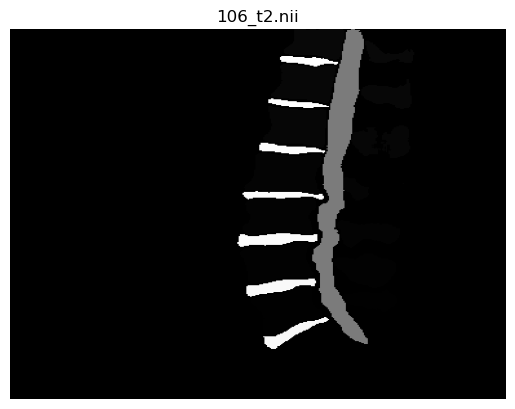

In [11]:
def plot_images(images_list, name):
    print("Plotting", len(images_list), name)
    for key, value in images_list.items():
        plt.imshow(value, cmap='gray', aspect='auto')
        plt.axis('off')
        plt.title(key)
        plt.show()

# Plot the images
plot_images(sagittal_view_list, 'Images')

# Plot the masks
plot_images(mask_list, 'Masks')

### Padding Images
- Pad the images and masks to the desired size.


### Notes:
- The images are of size (896, 896) and the masks are of size (896, 896)
- It is important to resize the images and masks to the desired size before training the model. - it will be enhanced more-

In [5]:
# Pad the images
# def apply_padding(images_list, max_dimensions, name):
#     print("Applying padding to ", len(images_list), name)
#     for key, image_array in images_list.items():
#         padded_img = pad_image(image_array, max_dimensions)
#         # replace the members in sagittal view list with the padded image
#         images_list[key] = padded_img
#         # print(image_array.shape)
#         plt.imshow(padded_img, cmap='gray', aspect='auto')
#         plt.axis('off')
#         plt.show()

# # Apply padding to images
# apply_padding(sagittal_view_list, max_dimensions, 'Images')

# # Apply padding to masks
# apply_padding(mask_list, max_dimensions_mask, 'Masks')

In [6]:
# # Print the Dict keys and values after padding
# for key, value in sagittal_view_list.items():
#     print(key, value.shape)

### Apply enhancment Techniques
- [x] Apply CLAHE technique to enhance the contrast of the images.
- [ ] Apply Gaussian Blur to smooth the images.
- [ ] Apply Histogram Equalization to enhance the contrast of the images.
- [ ] Apply Random Noise to the images.
- [x] Apply Rotation to the images.

The above techniques will help in improving the performance of the model. for the demo purpose, We have applied only the CLAHE technique to enhance the contrast of the images.

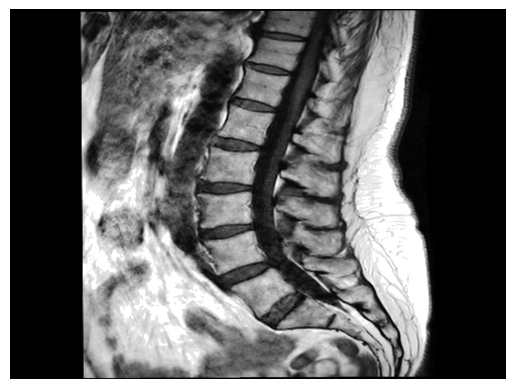

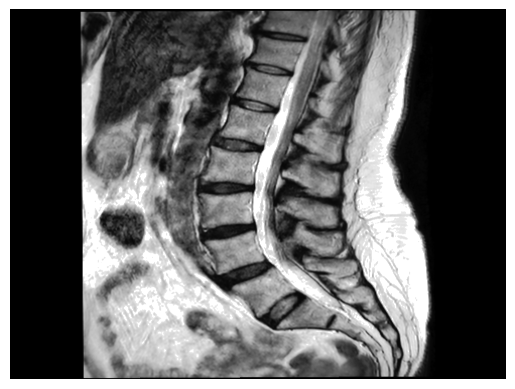

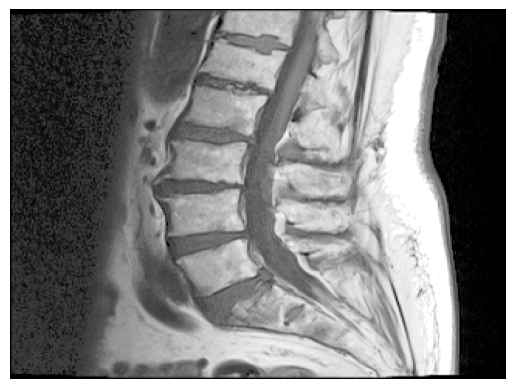

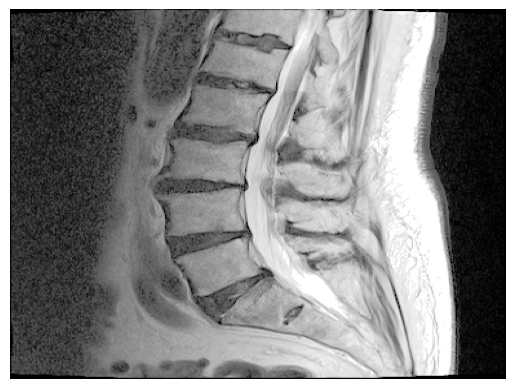

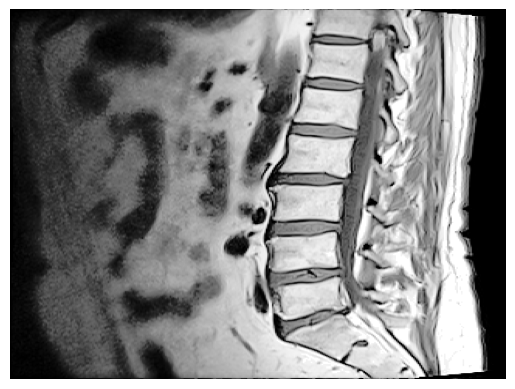

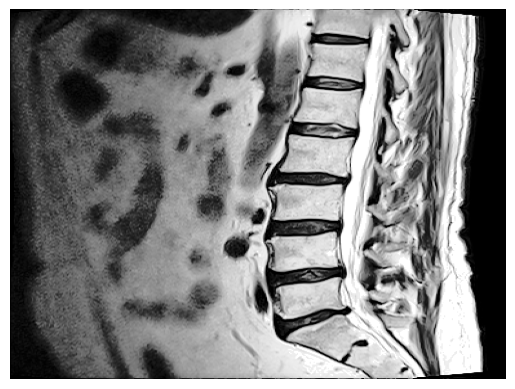

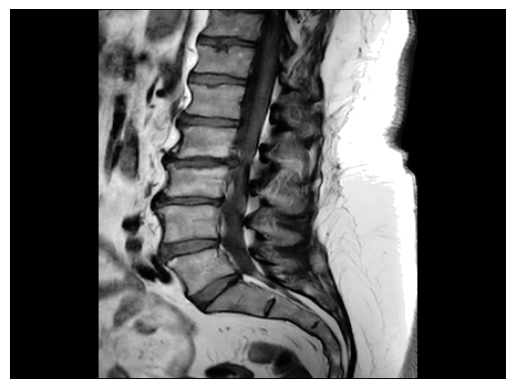

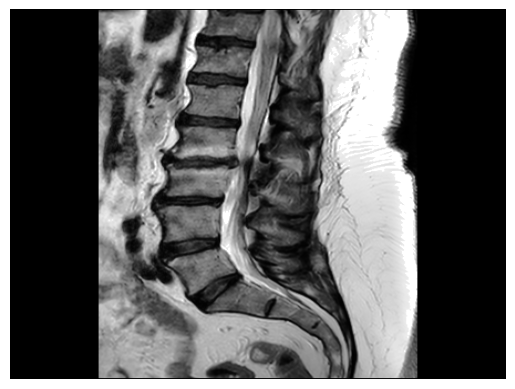

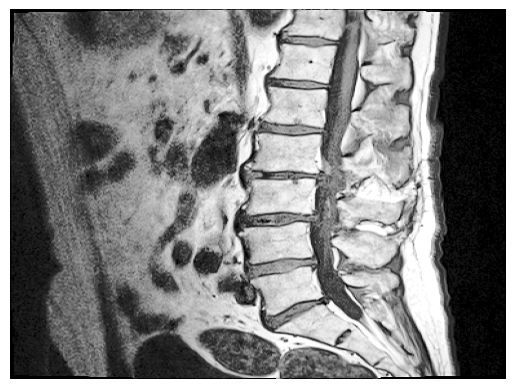

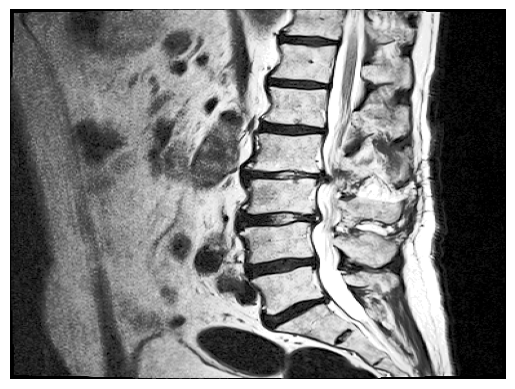

In [12]:
from skimage import exposure
import cv2

for key, value in sagittal_view_list.items():
    equalized_image = exposure.equalize_hist(value)
    plt.imshow(equalized_image, cmap='gray', aspect='auto') # y-z plane
    plt.axis('off')
    plt.show()